# Thresholding
### - Simple Thresholding, Adaptive Thresholding, Otsu and Riddler-Calvard

### Import the necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mahotas
import cv2

%matplotlib inline

### Load the image, convert it to grayscale, and blur it slightly

Text(0.5,1,'Image')

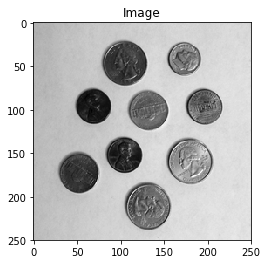

In [2]:
image = cv2.imread("images/image3.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

plt.imshow(image, cmap='gray')
plt.title("Image")

# 1. Simple Thresholding

### Let's apply basic thresholding. 

The first parameter is the image we want to threshold, the second value is is our threshold cehck. 

If a pixel value is greater than our threshold (in this case, 155), we it to be WHITE, otherwise it is BLACK.

Text(0.5,1,'Threshold Binary Inverse')

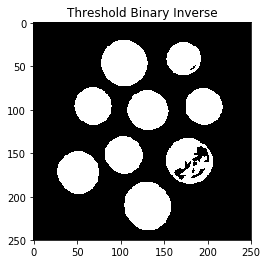

In [3]:
(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)

plt.imshow(threshInv, cmap='gray')
plt.title("Threshold Binary Inverse")

### Using a normal we can change the last argument in the function to make the coins black rather than white.

Text(0.5,1,'Threshold Binary')

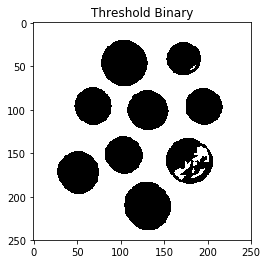

In [4]:
(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.title("Threshold Binary")

### Finally, let's use our threshold as a mask and visualize only the coins in the image

Text(0.5,1,'Coins')

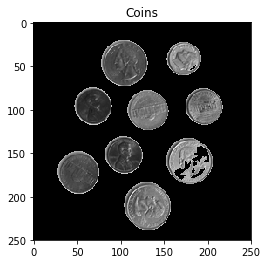

In [5]:
coins = cv2.bitwise_and(image, image, mask = threshInv)

plt.imshow(coins, cmap='gray')
plt.title("Coins")

# 2. Adaptive Thresholding

In our previous example, we had to use manually specify a pixel value to globally threshold the image. 

In this example we are going to examine a neighborbood of pixels and adaptively apply thresholding to each neighborbood. We'll calculate the mean value of the neighborhood area of 11 pixels and threshold based on that value. 

Finally, our constant C is subtracted from the mean calculation (in this case 4)

Text(0.5,1,'Mean Thresholding and Gaussian Thresholding')

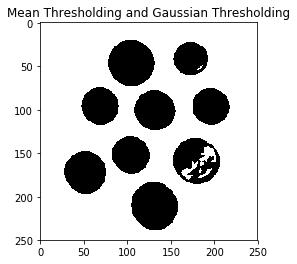

In [6]:
threshArray = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
    
plt.imshow(thresh, cmap='gray',)
plt.title("Mean Thresholding and Gaussian Thresholding")

### We can also apply Gaussian thresholding in the same manner

Text(0.5,1,'Gaussian Thresh')

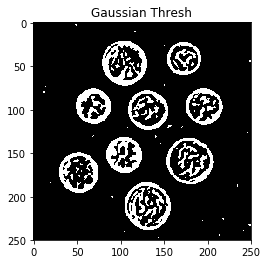

In [7]:
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)

plt.imshow(thresh, cmap='gray')
plt.title("Gaussian Thresh")

# 3. Otsu and Riddler-Calvard

OpenCV provides methods to use Otsu's thresholding, but I find the mahotas implementation is more 'Pythonic'. 

Otsu's methodassumes that are two 'peaks' in the grayscale histogram. It finds these peaks, and then returns a value we should threshold on.

In [8]:
T = mahotas.thresholding.otsu(blurred)
print("Otsu's threshold: {}".format(T))

Otsu's threshold: 137


Applying the threshold can be done using NumPy, where values smaller than the threshold are set to zero, and values above the threshold are set to 255 (white).

Text(0.5,1,'Otsu')

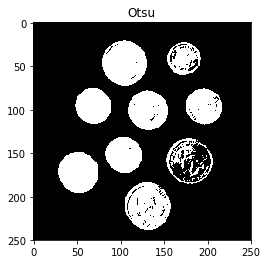

In [9]:
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)

plt.imshow(thresh, cmap='gray')
plt.title("Otsu")

### An alternative is to use the Riddler-Calvard method

In [10]:
T = mahotas.thresholding.rc(blurred)
print("Riddler-Calvard: {}".format(T))

Riddler-Calvard: 137.799281092233


Applying the threshold can be done using NumPy, where values smaller than the threshold are set to zero, and values above the threshold are set to 255 (white).

Text(0.5,1,'Riddler-Calvard')

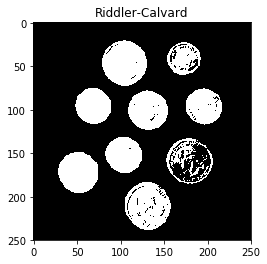

In [11]:
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)

plt.imshow(thresh, cmap='gray')
plt.title("Riddler-Calvard")